In [1]:
from impact import Impact

from distgen import Generator

import numpy as np

import os 

ROOT = os.environ['LCLS_LATTICE']

In [2]:
# Nicer plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,4)

# cu_inj Impact-T

In [3]:
ifile = os.path.join(ROOT, 'impact/models/cu_inj/ImpactT.yaml')
gfile = os.path.join(ROOT, 'distgen/models/cu_inj/distgen.yaml')
assert os.path.exists(ifile)
assert os.path.exists(gfile)


In [43]:
I = Impact.from_yaml(ifile)

# Check Energies

In [11]:
from impact.autophase import autophase_and_scale

from pmd_beamphysics import single_particle

P0 = single_particle(pz=1e-15, z=1e-15)

# Energy out of the gun
I.track(P0, s = 0.5)['mean_energy']

6000000.000536164

In [24]:
I.track(P0, s = I['L0A_exit']['s'])['mean_energy']

63999920.35416556

In [25]:
I.track(P0, s = I['L0B_exit']['s'])['mean_energy']

134998738.00281993

In [30]:
?autophase_and_scale

Signature:
autophase_and_scale(
    impact_object,
    phase_ele_name=None,
    phase_attribute='theta0_deg',
    scale_ele_name=None,
    scale_attribute='rf_field_scale',
    phase_range=(-180, 180),
    scale_range=(10000000.0, 100000000.0),
    initial_particles=None,
    isolate=True,
    metric='mean_energy',
    target=6000000.0,
    debug=False,
    algorithm='brent2',
    verbose=False,
)
Docstring:
Autophases and scales and element (or group).

The bounds of the element are automatically determined. If scale or phase elements are groups, 
this will be taken into account.

initial_particles should be a ParticleGroup, and will be tracked to the beginning of the bounds.

if isolate, then any other elements with an rf_field_scale will be disabled. 

If debug, the phase_and_scale function and copied object will be returned.
This is useful for algorithm development
File:      ~/Code/GitHub/lume-impact/impact/autophase.py
Type:      function


# Gun Phasing

In [ ]:
autophase_and_scale(I, phase_ele_name='GUN_phase', phase_attribute='dtheta0_deg', scale_ele_name='GUN_scale', scale_attribute='voltage', target=6e6, scale_range=(4e6, 6e6), metric='mean_energy', initial_particles=P0, verbose=True)

In [ ]:
# L0A, L0B

In [35]:
autophase_and_scale(I, phase_ele_name='L0A_phase', phase_attribute='dtheta0_deg', scale_ele_name='L0A_scale', scale_attribute='voltage',
                    target=64e6, scale_range=(10e6, 100e6), initial_particles=P0, verbose=True, debug=False)

Copied initial Impact object. 
Phasing L0A_phase by changing dtheta0_deg
Scaling L0A_scale by changing voltage
Bounds: 1.485, 4.527856 m
Tracking initial particles to s = 1.485
Initial particle:  1.48506261613 6000000.000536164
Disabling GUN
Disabling SOL1
Disabling L0B_entrance
Disabling L0B_body_1
Disabling L0B_body_2
Disabling L0B_exit
Default brent2 algorithm
Phase: 180, Scale: 10000000.0, 5.6713624735421595 MeV
Phase: 180, Scale: 10000000.0, 5.6713624735421595 MeV
Phase: 42.49224000000004, Scale: 10000000.0, 12.366231916317817 MeV
Phase: 264.9844890561601, Scale: 10000000.0, 7.739824370611267 MeV
Phase: 42.49224000000004, Scale: 10000000.0, 12.366231916317817 MeV
Phase: 42.49223440298533, Scale: 10000000.0, 12.366232728530246 MeV
Phase: 264.9844709438398, Scale: 10000000.0, 7.739822159625939 MeV
Phase: 222.49226880228161, Scale: 10000000.0, 4.761796485950503 MeV
Phase: 127.47670402554945, Scale: 10000000.0, 4.125078050743394 MeV
Phase: 333.73836754234685, Scale: 10000000.0, 15.405

(359.9947387160255, 57999993.71289438)

In [36]:
ps_f, Itest = autophase_and_scale(I, phase_ele_name='L0A_phase', phase_attribute='dtheta0_deg', scale_ele_name='L0A_scale', scale_attribute='voltage',
                    target=64e6, scale_range=(10e6, 100e6), initial_particles=P0, verbose=True, debug=True)

Copied initial Impact object. 
Phasing L0A_phase by changing dtheta0_deg
Scaling L0A_scale by changing voltage
Bounds: 1.485, 4.527856 m
Tracking initial particles to s = 1.485
Initial particle:  1.48506261613 6000000.000536164
Disabling GUN
Disabling SOL1
Disabling L0B_entrance
Disabling L0B_body_1
Disabling L0B_body_2
Disabling L0B_exit


Phase: -2.0, Scale: 58000000.0, 63.96555513958215 MeV
Phase: -1.5, Scale: 58000000.0, 63.980749418659144 MeV
Phase: -1.0, Scale: 58000000.0, 63.99155786093261 MeV
Phase: -0.5, Scale: 58000000.0, 63.997974975687065 MeV
Phase: 0.0, Scale: 58000000.0, 63.99999560696211 MeV
Phase: 0.5, Scale: 58000000.0, 63.997614932530766 MeV
Phase: 1.0, Scale: 58000000.0, 63.99082846389954 MeV
Phase: 1.5, Scale: 58000000.0, 63.97963204375375 MeV
Phase: 2.0, Scale: 58000000.0, 63.96402184697981 MeV


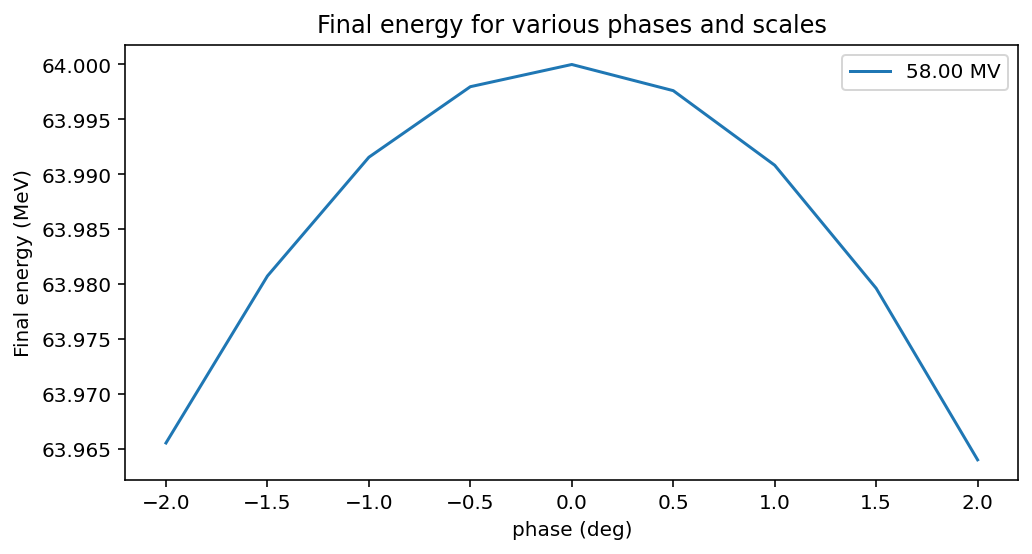

In [38]:
# Phases to try
ptry = np.linspace(-2, 2, 9)

# scales to try
sc = 58e6
res = np.array([ps_f(p, sc)/1e6 for p in ptry])
plt.plot(ptry, res, label=f'{sc/1e6:0.2f} MV')
plt.title('Final energy for various phases and scales')
plt.ylabel('Final energy (MeV)')
plt.xlabel('phase (deg)')
plt.legend()

In [ ]:
# Get scale/voltage factor
30048347.359377533/(64e6 - 6e6) * np.array( [0.86571945106805, 1, 1, 0.86571945106805])

In [44]:
autophase_and_scale(I, phase_ele_name='L0B_phase', phase_attribute='dtheta0_deg', scale_ele_name='L0B_scale', scale_attribute='voltage', target=135e6, scale_range=(50e6, 80e6), initial_particles=P0, verbose=True)

Copied initial Impact object. 
Phasing L0B_phase by changing dtheta0_deg
Scaling L0B_scale by changing voltage
Bounds: 5.328756, 8.371612 m
Tracking initial particles to s = 5.328756
Initial particle:  5.32873202582 63999925.01489361
Disabling GUN
Disabling SOL1
Disabling L0A_entrance
Disabling L0A_body_1
Disabling L0A_body_2
Disabling L0A_exit
Default brent2 algorithm
Phase: 180, Scale: 50000000.0, 13.002927310209074 MeV
Phase: 180, Scale: 50000000.0, 13.002927310209074 MeV
Phase: 42.49224000000004, Scale: 50000000.0, 101.59136505495906 MeV
Phase: 264.9844890561601, Scale: 50000000.0, 59.608022608620566 MeV
Phase: 42.49224000000004, Scale: 50000000.0, 101.59136505495906 MeV
Phase: 42.49223440298533, Scale: 50000000.0, 101.59136842346142 MeV
Phase: 264.9844709438398, Scale: 50000000.0, 59.60800657336192 MeV
Phase: 222.49225164365203, Scale: 50000000.0, 26.506310998626404 MeV
Phase: 127.47670402554945, Scale: 50000000.0, 32.8632206529148 MeV
Phase: 333.73836098833385, Scale: 50000000.0,

(359.99951567937313, 70000011.60260417)

# Integrated Solenoid field

In [45]:
from impact import  fieldmaps
import numpy as np

# Fieldmaps are stored here
I.input['fieldmaps'].keys()

dict_keys(['rfdata201', 'rfdata102', 'rfdata4', 'rfdata5', 'rfdata6', 'rfdata7'])

In [46]:
# Look at a solrf element. 
I.ele['SOL1']

{'description': 'name:SOL1',
 'original': '0.49308 0 0 105 0.0 0.0 0.0 0.0 102 0.15 0.0 0.0 0.0 0.0 0.0 0.243 /!name:SOL1',
 'L': 0.49308,
 'type': 'solrf',
 'zedge': 0.0,
 'rf_field_scale': 0.0,
 'rf_frequency': 0.0,
 'theta0_deg': 0.0,
 'filename': 'rfdata102',
 'radius': 0.15,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 'solenoid_field_scale': 0.243,
 's': 0.49308,
 'name': 'SOL1'}

In [47]:
# That data is here. 
rdfata = I.input['fieldmaps']['rfdata102']

#This will process the fieldmap to extract Ez and Bz
fmap = fieldmaps.process_fieldmap_solrf(rdfata['data'])
fmap

{'Ez': {'z0': 0.0, 'z1': 0.0, 'L': 0.0, 'fourier_coefficients': array([0.])},
 'Bz': {'z0': -0.53308,
  'z1': 0.49308,
  'L': 1.02616,
  'fourier_coefficients': array([ 7.59104159e-01,  1.86860998e-01,  2.68209187e-09, -4.75732117e-01,
          5.68488796e-09, -2.63303014e-01, -2.00685489e-10,  8.31385362e-02,
         -1.07061180e-09,  3.32147505e-02,  3.34109023e-09, -4.03166145e-03,
          2.36977653e-09,  7.55695585e-02,  7.03628508e-09,  4.05472421e-02,
         -7.93679210e-09, -2.78630279e-02, -2.80674359e-08, -1.23309101e-02,
         -1.21750197e-08, -1.11917490e-03,  2.72183881e-08, -1.76941899e-02,
          2.07775590e-08, -6.82928971e-03, -4.64611502e-09,  9.04327137e-03,
         -2.74644209e-08,  3.46208848e-03,  1.22819960e-08,  4.56318358e-04,
          2.11520498e-08,  4.27450120e-03, -2.88644504e-08,  7.52482987e-04,
         -3.59752217e-08, -2.87393685e-03,  1.26542743e-08, -8.38592686e-04,
          3.01815044e-08, -1.30737597e-04, -9.86177028e-09, -1.04357300

In [48]:
# Reconstruction function
fieldmaps.fieldmap_reconsruction(fmap['Bz'], 0)

0.006497827018878065

In [49]:
zmax = 0.49308

zlist = np.linspace(0, zmax, 1000)
fieldlist = [fieldmaps.fieldmap_reconsruction(fmap['Bz'], z) for z in zlist]

# z at max field
zlist[np.argmax(np.array(fieldlist))]

0.19496156156156158

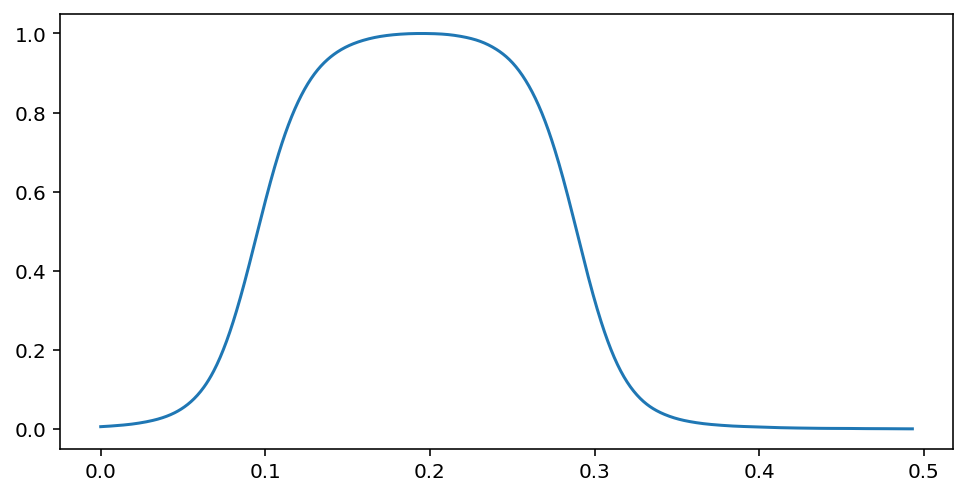

In [50]:
plt.plot(zlist, fieldlist)

In [51]:
# Integrated field (approximate)
dz = zmax/1000
BL = np.sum(fieldlist)*dz  # T*m

# 
BL * 10 # T*m -> kG*m

1.944494711358167

In [52]:
# Factor to convert BL in kG*m to Bmax in T
1/(BL * 10 )

0.5142724195436521

# Corrector Quads

In [53]:
ele = I.ele['CQ01']
ele

{'description': 'name:CQ01',
 'original': '0.36 0 0 1 0.01601  0.0 0.210 0.0254 0.0 0.0 0.0 0.0 0 /!name:CQ01',
 'L': 0.36,
 'type': 'quadrupole',
 'zedge': 0.01601,
 'b1_gradient': 0.0,
 'L_effective': 0.21,
 'radius': 0.0254,
 'x_offset': 0.0,
 'y_offset': 0.0,
 'x_rotation': 0.0,
 'y_rotation': 0.0,
 'z_rotation': 0.0,
 's': 0.37601,
 'name': 'CQ01'}

In [54]:
I['CQ01:b1_gradient']

0.0

In [55]:
# Factor to convert kG to T/m
0.1/ele['L_effective'] 

0.4761904761904762

# OLD

In [ ]:
I0 = Impact.from_yaml(ifile)

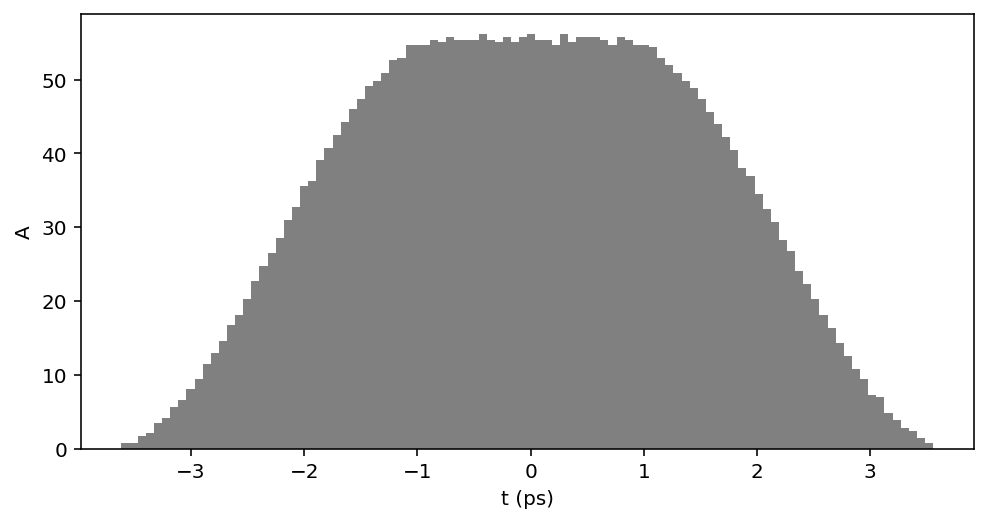

In [56]:
G = Generator(gfile)
G['n_particle'] = 10000
G.run()
P0 = G.particles
P0.plot('t')

In [57]:
P0

<ParticleGroup with 10000 particles at 0x7f84f6725750>

In [ ]:
%%time
I = Impact.from_yaml(ifile)
I.configure()
I.initial_particles = P0
I.total_charge=0
I.verbose=True
I.stop=8
I.run()
I.plot('mean_kinetic_energy')

Removed element: stop_1
Set stop to s = 8
Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpwv1p0bou
writing 10000 particles to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpwv1p0bou/partcl.data
Cathode start with cathode_kinetic_energy_ref = 1.0 eV
Cathode start: Replaced Np with 10000 according to initial particles
Cathode start: Replaced Bkenergy with 1.0 according to initial particles
Cathode start: Replaced Temission with 7.183946503142835e-12 according to initial particles
Cathode start: Replaced Tini with -3.5632234226414296e-12 according to initial particles
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.0 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:           60          60
 pass setting up lattice...
 check randomness:            0  0.79479214134216858     
 avgpts, jlow, and jhigh:    

# Parallel run

In [ ]:
G = Generator(gfile)
G['n_particle'] = 2000
G.run()
P0 = G.particles
P0.plot('t')

In [ ]:
?Impact

In [ ]:
I = Impact(input_file=ifile, initial_particles = P0, verbose=False, use_tempdir=False, workdir='/Users/chrisonian/Scratch/temp')

# Make new elements
def new_write_beam(s, i, sample_frequency=1):
    if i in [40, 50]:
        print('Warning: will overwrite standard output files')
    ele = {'type':'write_beam', 'sample_frequency':sample_frequency}
    ele['filename'] = 'fort.'+str(i)
    ele['name'] = 'write_beam_'+str(i)
    ele['s'] = s
    return ele
def new_write_beams(slist, istart, sample_frequency=1):
    eles = []
    if len(slist) > 100:
        print('Warning: the maximum number of phase-space files which can be output is 100.')
    i = istart
    for s in slist:
        ele = new_write_beam(s, i, sample_frequency)
        eles.append(ele)
        i += 1
    return eles
slist = np.linspace(0.001, 4, 99)
neweles = new_write_beams(slist, 100)

In [ ]:
# Change some things
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 5e-13
I.stop = 15

# Set parallel domain
I.header['Npcol'] = 1
I.header['Nprow'] = 4

# Turn on MPI switches
I.use_mpi=True
I.impact_bin = '$IMPACTT_MPI_BIN'
I.mpi_exe = 'mpirun' 

I.write_input()